# Pymaceuticals Inc.
---

### Analysis

The majority of mice were treated with Capomulin and Ramicane, with Capomulin being the most popular. Of the mice treated in the study the slight majority were male mice, but it was very near to a 50% split. Both Ramicane and Capomulin were better than their competitors with average tumor size after treatment, with no outliers. It took about 20 days of treatment for mouse l509 Capomulin to take effect, but when it did it seemed to work well to prevent the growth of and futher the shrinkage of the tumor. There was a strong correlation between average mouse weight and tumor size for mice on Campmulin. Suggesting that heavier mice, may grow larger tumors. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on= "Mouse ID")

# Display the data table for preview
study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == duplicate_mouse_ids[0] ]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
means = clean_study_data_complete.groupby("Drug Regimen").mean("Tumor Volume (mm3)")
medians = clean_study_data_complete.groupby("Drug Regimen").median("Tumor Volume (mm3)")
variances = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdDevs = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
stdErrs = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [16]:
#Generate a summary dictionary
summaryDict = {
    "Mean Tumor Volume": means["Tumor Volume (mm3)"],
    "Median Tumor Volume": medians["Tumor Volume (mm3)"],
     "Tumor Volume Variance": variances,
     "Tumor Volume Std. Dev.": stdDevs,
     "Tumor Volume Std. Err.": stdErrs
}
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

df = pd.DataFrame(summaryDict)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2 = clean_study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [21]:
counts = clean_study_data_complete["Drug Regimen"].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

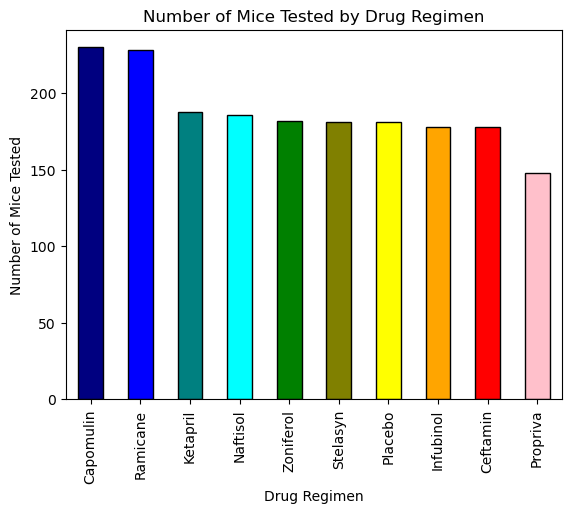

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts.plot(kind="bar",
           color=['navy','blue','teal','cyan','green', 'olive', 'yellow', 'orange', 'red', 'pink'],
            edgecolor="black"
           )
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show

In [25]:
counts.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

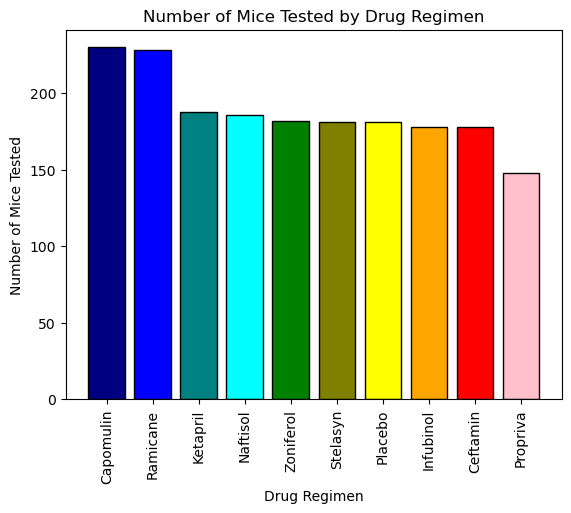

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values,
        counts.values,
           color=['navy','blue','teal','cyan','green', 'olive', 'yellow', 'orange', 'red', 'pink'],
            edgecolor="black"
           )
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show

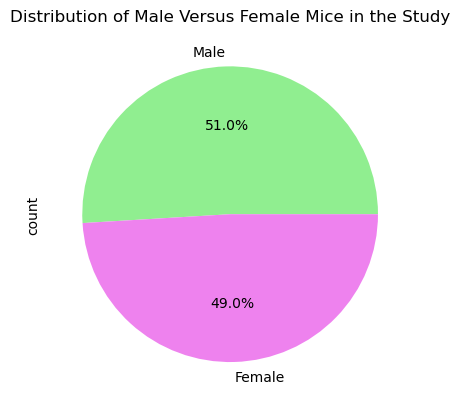

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_study_data_complete["Sex"].value_counts()
counts.plot(kind="pie",autopct="%1.1f%%",colors=["lightgreen","violet"])
plt.title("Distribution of Male Versus Female Mice in the Study")
plt.show()

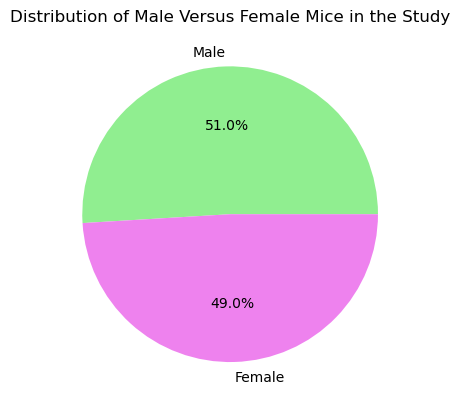

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values,labels=counts.index.values,autopct="%1.1f%%",colors=["lightgreen","violet"])
plt.title("Distribution of Male Versus Female Mice in the Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
MaxTime = clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max()
MaxTime = MaxTime.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = MaxTime.merge(clean_study_data_complete, on=["Mouse ID","Timepoint"], how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatment_list:
    #print(treatment)
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    tumor_vol_list.append(final_tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)|(final_tumor_vol>upper_bound)]
    if len(outliers)== 0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o} "
        print(output)


Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458 
Ceftamin's potential outliers: None


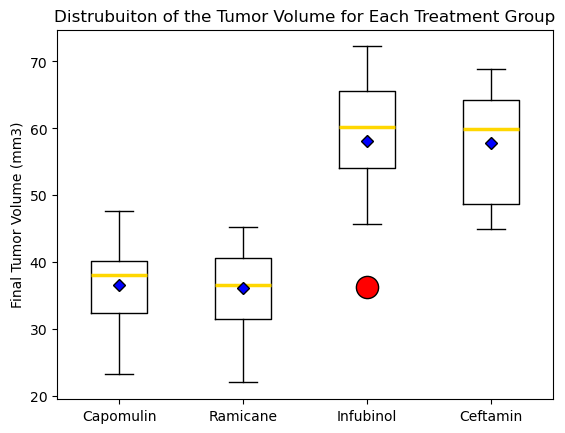

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red',markersize=16, markeredgecolor='black')
medianprops = dict(linestyle='-', linewidth=2.5, color='gold')
meanpointprops = dict(marker='D', markeredgecolor='black',markerfacecolor='blue')
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=flierprops, medianprops=medianprops, meanprops= meanpointprops,showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Distrubuiton of the Tumor Volume for Each Treatment Group")
plt.show()

## Line and Scatter Plots

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [54]:

capomulinDF = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulinDF.head()
l509Data = capomulinDF.loc[capomulinDF["Mouse ID"] == "l509"]
l509Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


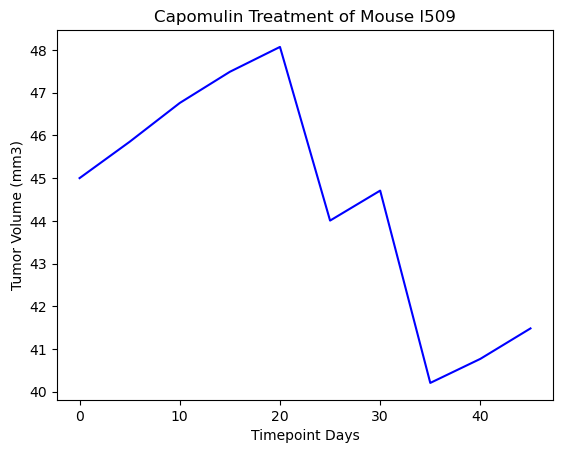

In [52]:
plt.plot(l509Data["Timepoint"],
         l509Data["Tumor Volume (mm3)"],
         color="blue")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [96]:
# group by thge mouse id and take the means
capomulinAvgDF = capomulinDF.groupby("Mouse ID").mean('Weight (g)') 
#I keep gettying an error if I don't put in a column name, but it works after I enter a column name
capomulinAvgDF.head()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


<function matplotlib.pyplot.show(close=None, block=None)>

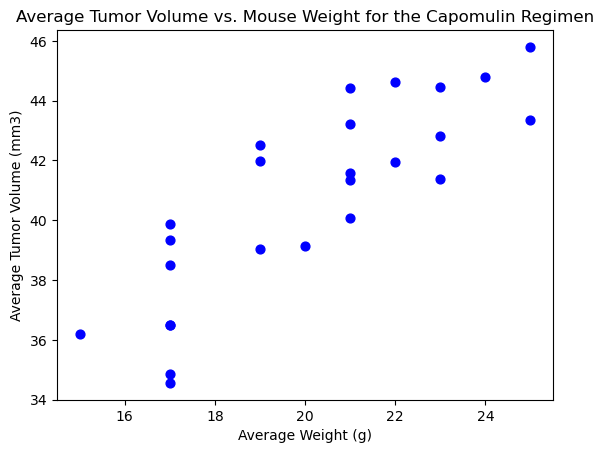

In [102]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(
    capomulinAvgDF['Weight (g)'],
    capomulinAvgDF['Tumor Volume (mm3)'],
    facecolor= "Blue",
    edgecolor= "blue",
    s=40
)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show

## Correlation and Regression

In [104]:
corr = st.pearsonr(capomulinAvgDF['Weight (g)'],capomulinAvgDF['Tumor Volume (mm3)'])[0]
corr

0.841936342469472

the correlation between mouse weight and the average tumor volume is 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

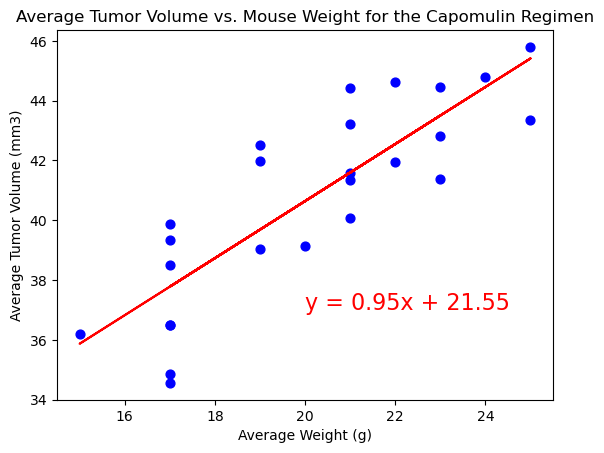

In [112]:
# Calculate the correlation coefficient and a linear regression model 
print(f"the correlation between mouse weight and the average tumor volume is {corr:.2f}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_val = capomulinAvgDF['Weight (g)']
y_val = capomulinAvgDF['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(capomulinAvgDF['Weight (g)'],
                                                          capomulinAvgDF['Tumor Volume (mm3)'])
regressVal = x_val * slope + intercept
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

#plot the graph
plt.scatter(x_val,y_val,facecolor="blue", edgecolor="blue", s=40)
plt.plot(x_val, regressVal, "r-")
plt.annotate(lineEQ, (20,37), fontsize=16, color="red")

plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show